In [ ]:
#冯毅东，405770027@qq.com
#2017.12.29

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#在原数据第一行后加个分号 ；
data = pd.read_csv('轨迹数据.txt',usecols=range(6))

In [4]:
print(data.shape)
data.head()

(609395, 6)


,vehicle-id,time,x-coordinate,y-coordinate,speed,category
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0


In [5]:
# id 
ID = data['vehicle-id'].value_counts()

In [6]:
print(len(ID))
ID.head()

5415


c1b44f6deae181d6f6b818987cfa553c    739
51529c093901a091318c1192149c1b06    632
cbc61ac50fed42a169f4ed88ff922b83    599
2b1dbf8204b5d81e827490c449f91242    579
d881e7475063ec1d6890b20b8bbe079b    577
Name: vehicle-id, dtype: int64

count    5415.000000
mean      112.538319
std        94.643060
min         1.000000
25%        44.000000
50%        83.000000
75%       153.000000
max       739.000000
Name: vehicle-id, dtype: float64


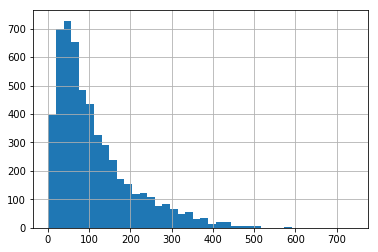

In [7]:
%matplotlib inline
print(ID.describe())
ID.hist(bins=40)

In [8]:

#time
data['datetime'] = pd.to_datetime(data.time, unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')
data.datetime.head()

0   2017-05-04 08:52:44+08:00
1   2017-05-04 08:52:47+08:00
2   2017-05-04 08:52:50+08:00
3   2017-05-04 08:52:53+08:00
4   2017-05-04 08:52:56+08:00
Name: datetime, dtype: datetime64[ns, Asia/Shanghai]

71293


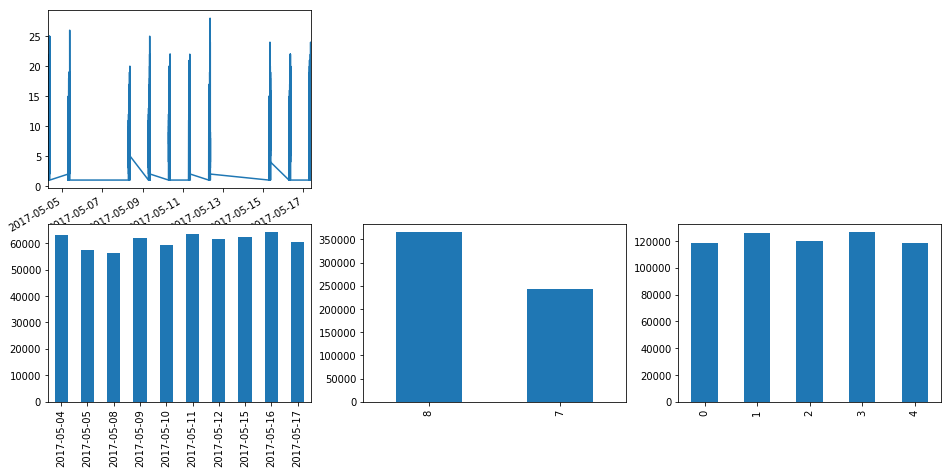

In [9]:
print(len(data.time.unique()))
fig = plt.figure(figsize=(16,8))
data.datetime.value_counts().plot(ax=fig.add_subplot(231))
date = data.datetime.dt.date.value_counts()
date[date.index.sort_values()].plot(ax=fig.add_subplot(234),kind='bar')
data.datetime.dt.hour.value_counts().plot(ax=fig.add_subplot(235),kind='bar')
#可以看到数据都来自夜晚11-12点。这个时候其他车辆应该较少。
weekday = data.datetime.dt.weekday.value_counts()
weekday.loc[weekday.index.sort_values()].plot(ax=fig.add_subplot(236),kind='bar')
#应当注意同一时间段内的数据23点和0点对应不同的date

count    609395.000000
mean          4.533246
std           5.307853
min           0.000000
25%           0.000000
50%           2.100000
75%           8.700000
max         101.800000
Name: speed, dtype: float64


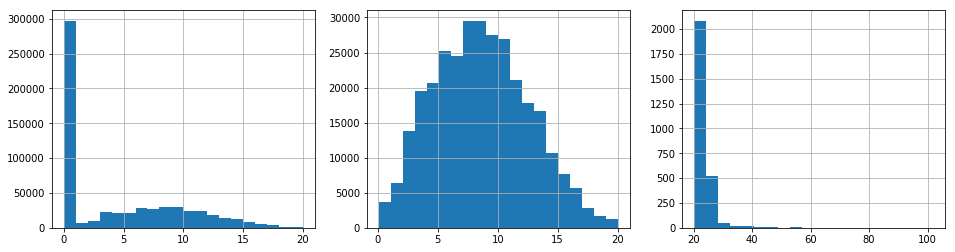

In [10]:
#速度
#速度为零表示停车
print(data.speed.describe())
fig = plt.figure(figsize=(16,4))
data.speed[data.speed<=20].hist(ax=fig.add_subplot(131),bins=20,label='0-20')
data.speed[(data.speed>0)&(data.speed<=20)].hist(ax = fig.add_subplot(132),bins=20)
data.speed[data.speed>20].hist(ax=fig.add_subplot(133),bins=20)

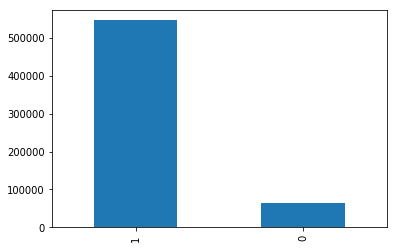

In [11]:
#分类（category）情况
data.category.value_counts().plot('bar')

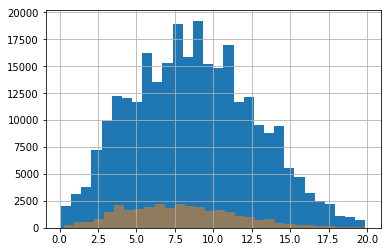

In [12]:
temp= data[data.category==1].speed; 
temp[(temp>0)&(temp<20)].hist(bins=30); 
temp= data[data.category==0].speed; 
temp[(temp>0)&(temp<20)].hist(bins=30,alpha=0.5)

In [13]:
# 分路段讨论

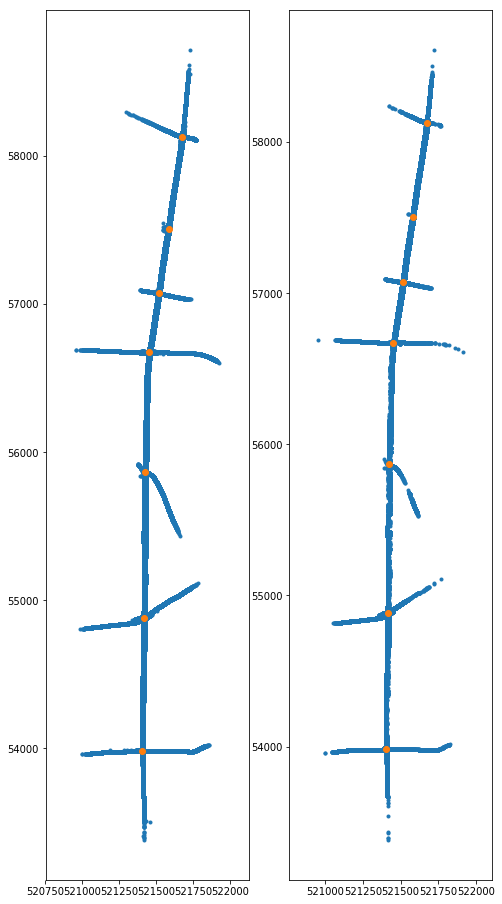

In [14]:
#signal_location.txt 为自己手动标注的位置信息
signal = pd.read_csv('signal_location.txt')
fig = plt.figure(figsize=(8,16))
ax = fig.add_subplot(121)
#所有数据形成的地图（x，y等比例显示）
ax.scatter(data['x-coordinate'],data['y-coordinate'],alpha=1,marker='.')
ax.scatter(signal.x,signal.y)
ax.set_aspect('equal', 'datalim')
ax2=fig.add_subplot(122)
#速度为0等数据形成的地图（x，y等比例显示）
ax2.scatter(data[data.speed==0]['x-coordinate'],data[data.speed==0]['y-coordinate'],alpha=1,marker='.')
ax2.scatter(signal.x,signal.y)
ax2.set_aspect('equal', 'datalim')


In [33]:
signal

,NO,x,y
0,1,521675,58127
1,2,521583,57504
2,3,521517,57070
3,4,521453,56672
4,5,521426,55866
5,6,521417,54882
6,7,521405,53984


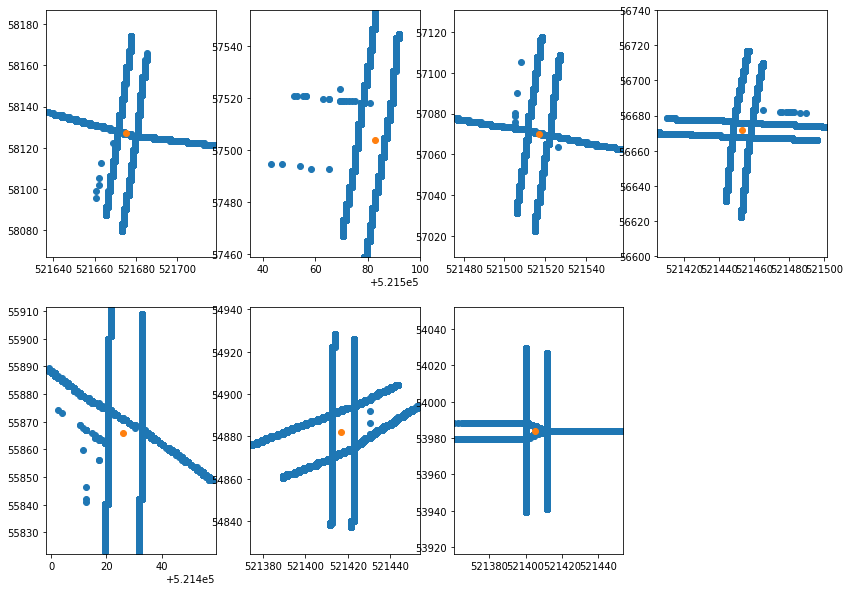

In [15]:
#放大显示各路口情况
fig = plt.figure(figsize=(14,10))
for i in range(7):
    ax = fig.add_subplot(2,4,i+1)
    temp = data[abs(data['x-coordinate']-signal.x[i])+abs(data['y-coordinate']-signal.y[i])<50]
    ax.set_xlim([temp['x-coordinate'].min(),temp['x-coordinate'].max()])
    ax.set_ylim([temp['y-coordinate'].min(),temp['y-coordinate'].max()])
    ax.scatter(temp['x-coordinate'],temp['y-coordinate'])
    ax.scatter(signal.x[i],signal.y[i])
    ax.set_aspect('equal', 'datalim')


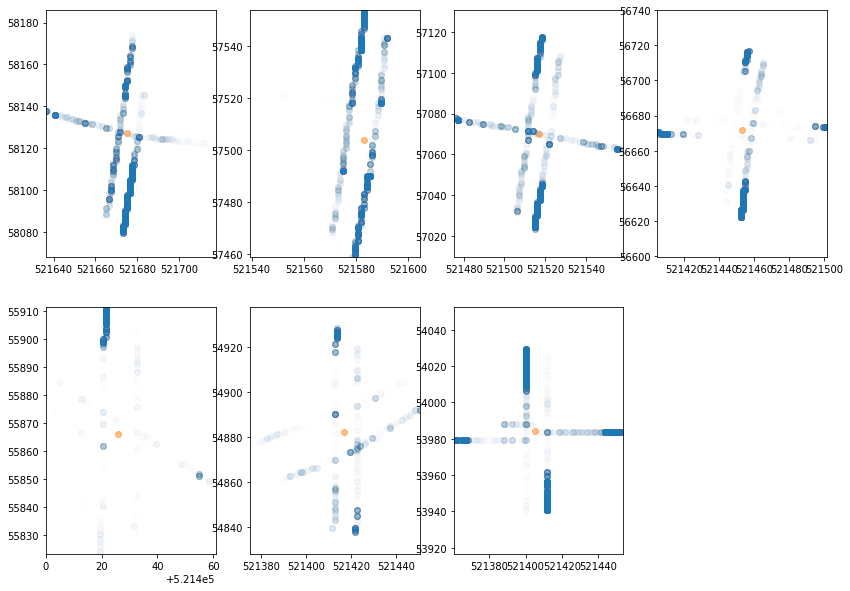

In [16]:
#放大显示各路口 speed==0的数据情况
fig = plt.figure(figsize=(14,10))
for i in range(7):
    ax = fig.add_subplot(2,4,i+1)
    temp = data[(abs(data['x-coordinate']-signal.x[i])+abs(data['y-coordinate']-signal.y[i])<50)&(data.speed==0)]
    ax.set_xlim([temp['x-coordinate'].min(),temp['x-coordinate'].max()])
    ax.set_ylim([temp['y-coordinate'].min(),temp['y-coordinate'].max()])
    ax.scatter(temp['x-coordinate'],temp['y-coordinate'],alpha=0.01)
    ax.scatter(signal.x[i],signal.y[i],alpha=0.5)
    ax.set_aspect('equal', 'datalim')

In [17]:
# 将位于signal_location附近距离小于20的数据的cross标记为True
# 统计cross为True的数据占比情况
data['cross'] = data.apply(lambda x: (abs(x['x-coordinate']-signal.x)+abs(x['y-coordinate']-signal.y)<30).sum(),axis=1)
print(data.cross.value_counts(normalize=True))

0    0.931524
1    0.068476
Name: cross, dtype: float64


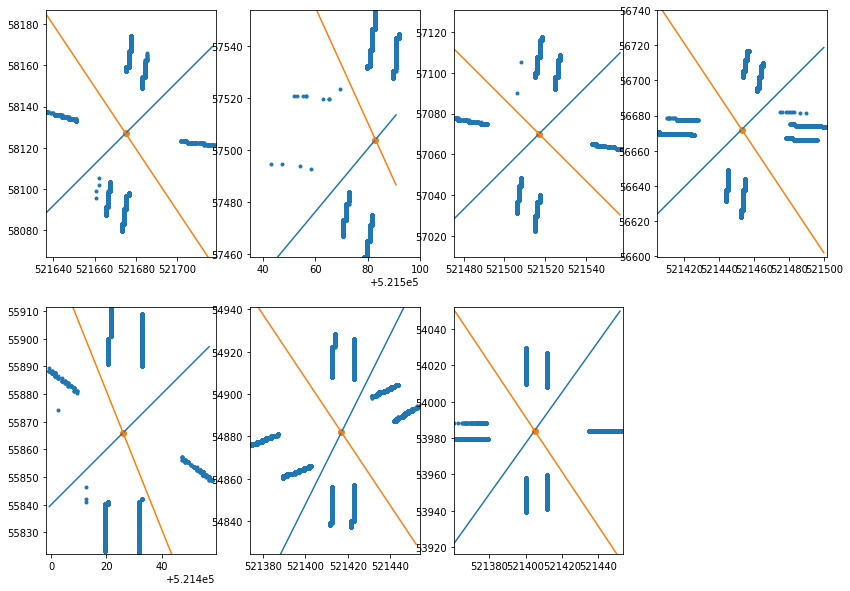

In [18]:
#删除十字路口附近的数据，避免所在道路判断错误，取距离信号灯麦哈顿距离30的点删除
fig = plt.figure(figsize=(14,10))
k1 = [1, 1.2, 1, 1, 1, 2, 1.4]
k2 = [1.5, 2.2, 1, 1.5, 2.5, 1.5, 1.5]
for i in range(7):
    ax = fig.add_subplot(2,4,i+1)
    temp = data[(abs(data['x-coordinate']-signal.x[i])+abs(data['y-coordinate']-signal.y[i])<50)&(data.cross==0)]
    ax.set_xlim([temp['x-coordinate'].min(),temp['x-coordinate'].max()])
    ax.set_ylim([temp['y-coordinate'].min(),temp['y-coordinate'].max()])
    ax.scatter(temp['x-coordinate'],temp['y-coordinate'],marker='.')
    ax.scatter(signal.x[i],signal.y[i])
    xlist = [temp['x-coordinate'].min()+x*(temp['x-coordinate'].max()-temp['x-coordinate'].min())/50 for x in range(50)]
    ylist = [signal.y[i]+k1[i]*((x-signal.x[i])) for x in xlist]
    ax.plot(xlist,ylist)
    '''
    if i ==4:
        ylist = [signal.y[i]-k2[i]*((x-signal.x[i])/5)**3 for x in xlist]
    else:
        ylist = [signal.y[i]-k2[i]*((x-signal.x[i])) for x in xlist]
    '''
    ylist = [signal.y[i]-k2[i]*((x-signal.x[i])) for x in xlist]
    ax.plot(xlist,ylist)
    ax.set_aspect('equal', 'datalim')



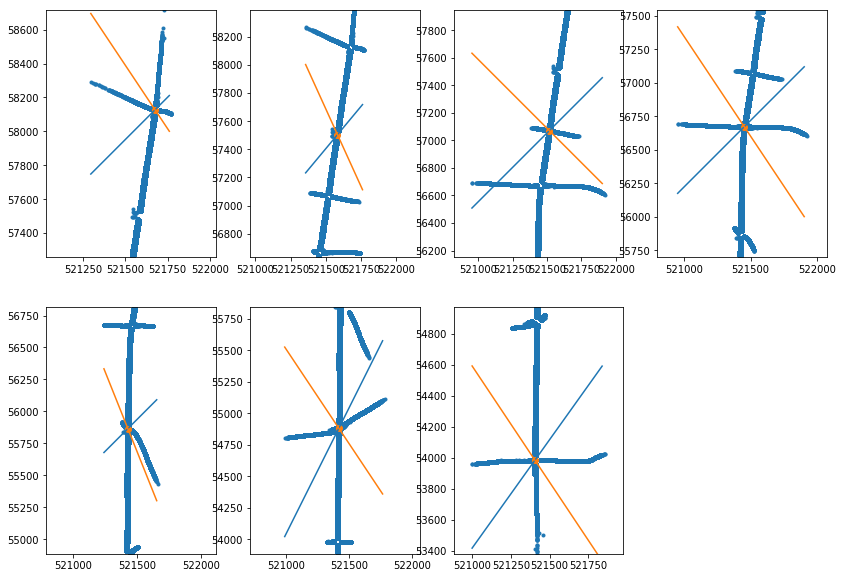

In [19]:
fig = plt.figure(figsize=(14,10))
for i in range(7):
    ax = fig.add_subplot(2,4,i+1)
    temp = data[(abs(data['x-coordinate']-signal.x[i])+abs(data['y-coordinate']-signal.y[i])<1000)&(data.cross==0)]
    ax.set_xlim([temp['x-coordinate'].min(),temp['x-coordinate'].max()])
    ax.set_ylim([temp['y-coordinate'].min(),temp['y-coordinate'].max()])
    ax.scatter(temp['x-coordinate'],temp['y-coordinate'],marker='.')
    ax.scatter(signal.x[i],signal.y[i])
    xlist = [temp['x-coordinate'].min()+x*(temp['x-coordinate'].max()-temp['x-coordinate'].min())/50 for x in range(50)]
    ylist = [signal.y[i]+k1[i]*((x-signal.x[i])) for x in xlist]
    ax.plot(xlist,ylist)
    '''
    if i ==4:
        ylist = [signal.y[i]-k2[i]*((x-signal.x[i])/5)**3 for x in xlist]
    else:
        ylist = [signal.y[i]-k2[i]*((x-signal.x[i])) for x in xlist]
    '''
    ylist = [signal.y[i]-k2[i]*((x-signal.x[i])) for x in xlist]
    ax.plot(xlist,ylist)
    ax.set_aspect('equal', 'datalim')

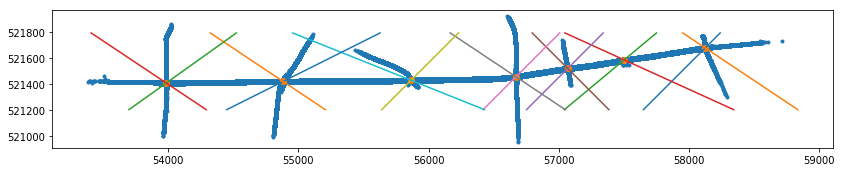

In [20]:
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(y=data['x-coordinate'], x=data['y-coordinate'],alpha=1,marker='.')
ax.scatter(y=signal.x, x=signal.y)
ax.set_aspect('equal')
xlist = [x for x in range(521200,521800,10)]
for i in range(7):
    ylist = [signal.y[i]+k1[i]*(x-signal.x[i]) for x in xlist]
    ax.plot(ylist,xlist)
    '''
    if i ==4:
        ylist = [signal.y[i]-k2[i]*((x-signal.x[i])/5)**3 for x in xlist]
    else:
        ylist = [signal.y[i]-k2[i]*((x-signal.x[i])) for x in xlist]
    '''
    ylist = [signal.y[i]-k2[i]*((x-signal.x[i])) for x in xlist]
    ax.plot(ylist,xlist)
    
    

In [21]:
def road(row):
    if row.cross :
        return '+'
    for i in range(7):
        if i == 6 or row['y-coordinate'] >= (signal.y[i]+signal.y[i+1])/2:
            result = [[str(i+1)+'down', str(i+1)+'right' ], [str(i+1)+'left', str(i+1)+'up']]
            line1 = row['y-coordinate'] > (signal.y[i]+k1[i]*(row['x-coordinate']-signal.x[i]))
            line2 = row['y-coordinate'] > (signal.y[i]-k2[i]*(row['x-coordinate']-signal.x[i]))
            return result[line1][line2]
        

In [22]:
data['road'] = data.apply(road,axis=1)

In [23]:
data.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,datetime,cross,road
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0,2017-05-04 08:52:44+08:00,0,6right
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0,2017-05-04 08:52:47+08:00,0,6right
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0,2017-05-04 08:52:50+08:00,0,6right
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0,2017-05-04 08:52:53+08:00,0,6right
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0,2017-05-04 08:52:56+08:00,0,6right


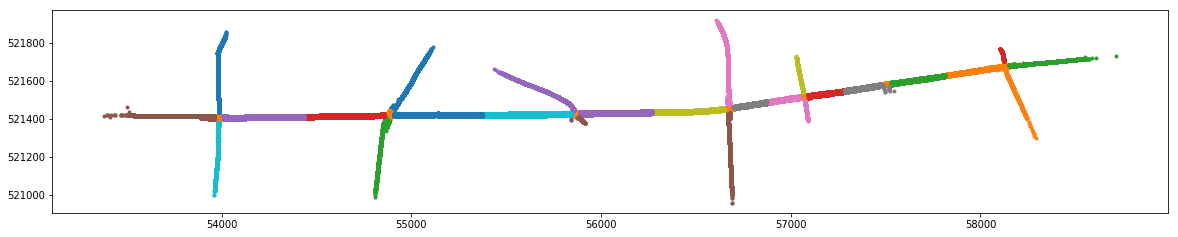

In [24]:
road_list = data.road.unique()
fig, ax = plt.subplots(figsize=(20,8))
ax.set_aspect('equal')
for r in road_list:
    temp = data[data.road==r]
    ax.scatter(y=temp['x-coordinate'], x=temp['y-coordinate'],alpha=1,marker='.')

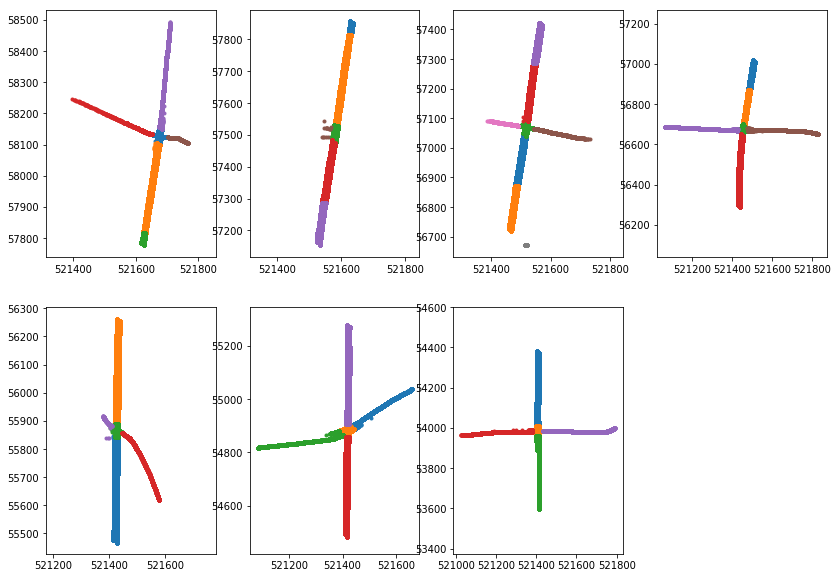

In [25]:
fig = plt.figure(figsize=(14,10))
for i in range(7):
    ax = fig.add_subplot(2,4,i+1)
    temp_data = data[abs(data['x-coordinate']-signal.x[i])+abs(data['y-coordinate']-signal.y[i])<400]
    road_list = temp_data.road.unique()
    for r in road_list:
        temp = temp_data[temp_data.road==r]
        ax.scatter(temp['x-coordinate'], temp['y-coordinate'],alpha=1,marker='.')
    ax.set_aspect('equal', 'datalim')


ID_index: 1864
3.0    115
0.0      2
2.0      1
4.0      1
Name: time, dtype: int64


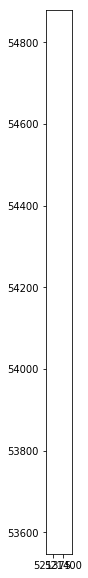

In [26]:
#这段代码随意看看数据
from IPython.display import HTML
import matplotlib.animation as animation
t = np.random.randint(len(ID))
print('ID_index:',t)
temp = data[data['vehicle-id']==ID.index[t]]
temp = temp.sort_values(by='time')
print(temp.time.diff(1).value_counts())
fig,ax = plt.subplots(figsize=(4,10))
ax.set_aspect('equal')
ax.set_xlim([temp['x-coordinate'].min(),temp['x-coordinate'].max()])
ax.set_ylim([temp['y-coordinate'].min(),temp['y-coordinate'].max()])
scat = ax.scatter([],[])
def update(i):
    scat.set_offsets(temp[['x-coordinate','y-coordinate']].iloc[i])
#ani = animation.FuncAnimation(fig, update, range(len(temp)), interval=30, repeat=False)
#HTML(ani.to_html5_video())

In [27]:
data.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,datetime,cross,road
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0,2017-05-04 08:52:44+08:00,0,6right
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0,2017-05-04 08:52:47+08:00,0,6right
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0,2017-05-04 08:52:50+08:00,0,6right
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0,2017-05-04 08:52:53+08:00,0,6right
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0,2017-05-04 08:52:56+08:00,0,6right


In [28]:
def splitpath_v1(DataFrame):
    delt_time_threshold = 12
    results =[]
    temp = DataFrame.sort_values(by='time')
    id_data = temp.reset_index(drop=True)
    time_diff = id_data.time.diff(1)
    threshold_index = time_diff[time_diff > delt_time_threshold].index.tolist()
    threshold_index.insert(0,0)
    threshold_index.append(None)
    for i,j in zip(threshold_index[:-1],threshold_index[1:]):
        results += path_v1(id_data[i:j])
    #if len(DataFrame)
    return [pd.Series(results,index=temp.index)]

In [29]:
def path_v1(Dataframe):
    results = []
    if len(Dataframe)>0:
        p = Dataframe.road.iloc[0]
        last_i = 0
        for i,r in enumerate(Dataframe.road):
            if r == '+':
                if p[-1]!='+':
                    p = p+'+' 
            elif r != p:
                results = results + [p+r]*(i-last_i)
                last_i = i
                p = r
        if len(results): results = results + [results[-1]]*(i-last_i+1)
        else: results = results + [p]*(i-last_i+1)
    return results

In [30]:
a = splitpath_v1(data[data['vehicle-id'] == data['vehicle-id'][10000]])
print(len(a))
print(len(data[data['vehicle-id'] == data['vehicle-id'][10000]]))
#a.head()

1
247


In [31]:
data['path']=pd.concat(data.groupby('vehicle-id').apply(splitpath_v1).sum())
data.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,datetime,cross,road,path
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0,2017-05-04 08:52:44+08:00,0,6right,6right+6left
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0,2017-05-04 08:52:47+08:00,0,6right,6right+6left
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0,2017-05-04 08:52:50+08:00,0,6right,6right+6left
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0,2017-05-04 08:52:53+08:00,0,6right,6right+6left
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0,2017-05-04 08:52:56+08:00,0,6right,6right+6left


In [32]:
print(data.path[:10],data.path[-10:])

0    6right+6left
1    6right+6left
2    6right+6left
3    6right+6left
4    6right+6left
5    6right+6left
6    6right+6left
7    6right+6left
8    6right+6left
9    6right+6left
Name: path, dtype: object 609385    7right+
609386    7right+
609387    7right+
609388    7right+
609389    7right+
609390    7right+
609391    7right+
609392    7right+
609393    7right+
609394    7right+
Name: path, dtype: object


In [34]:
segment=[(i+j)/2 for i,j in zip(signal.y[:-1],signal.y[1:])]

In [35]:
data['cycleTime'] = data.time%200

In [36]:
cross1=data[(data.speed==0)&(data['y-coordinate']>segment[0])].groupby(['cycleTime']).apply(
    lambda x: pd.DataFrame(x.path.value_counts()).T)

cross1 = cross1.reset_index(drop=True)
cross1 = cross1.fillna(0)

cross1.head()

,+,+1down,+1left,+1right,+1up,1down+,1down+1down,1down+1left,1down+1up,1down1up,1down2up,1left+,1left+1right,1left+1up,1left1up,1up+,1up+1down,1up+1left,1up+1right,2up1down
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,46,2.0,3.0,1.0,1.0,0.0,16,0.0,5,3.0
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,57,1.0,1.0,0.0,0.0,0.0,4,0.0,7,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,56,6.0,0.0,0.0,2.0,0.0,3,0.0,5,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,46,3.0,3.0,0.0,0.0,0.0,13,0.0,4,1.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,53,1.0,1.0,0.0,0.0,0.0,3,0.0,9,2.0


In [37]:
temp = cross1.max()
l = temp[temp>10].index.tolist()

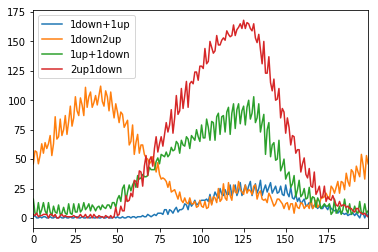

In [38]:
cross1[l].plot()

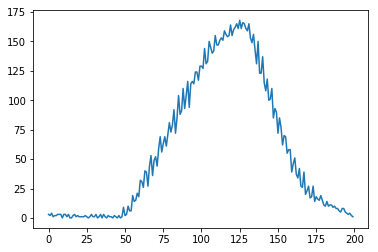

In [167]:
#忽略此行--------------------------（根据 2up1down 情况可以判断出 52秒的时候 位相3开始。）
#对 2up1down 数据对两部分做线性拟合，求最小值位置
y = cross1['2up1down'].tolist()
plt.plot(range(len(y)),y)

最小值对应横坐标为： 50
所以路口1的位相3是从 50s 开始的


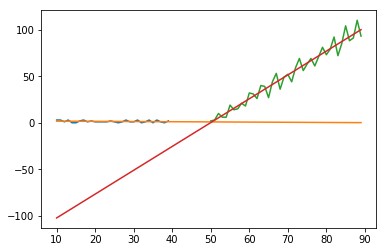

In [170]:
z1 = np.polyfit(range(10,40),y[10:40],1)
z2 = np.polyfit(range(50,90),y[50:90],1)

x = range(10,90)
y1 = z1[0]*x + z1[1]
y2 = z2[0]*x + z2[1]

plt.plot(range(10,40),y[10:40],x,y1,range(50,90),y[50:90],x,y2)
ty = abs(y1-y2)
print('最小值对应横坐标为：',ty.argmin()+x[0])
print('所以路口1的位相3是从 {}s 开始的'.format(ty.argmin()+x[0]))

In [40]:
cross2=data[(data.speed==0)&(data['y-coordinate']>segment[1])&
            (data['y-coordinate']<segment[0])].groupby(['cycleTime']).apply(
    lambda x: pd.DataFrame(x.path.value_counts()).T)

cross2 = cross2.reset_index(drop=True)
cross2 = cross2.fillna(0)
cross2.head()

,+2down,+2up,1down2up,2down+,2down+2up,2down2up,2down3up,2left+2down,2up+,2up+2down,2up+2left,2up+2up,2up1down,3up+2up,3up2down
0,0.0,0.0,45,0.0,1.0,0.0,11.0,0.0,1.0,35,1.0,0.0,19.0,0.0,1.0
1,0.0,0.0,39,0.0,0.0,0.0,15.0,0.0,0.0,26,0.0,0.0,20.0,0.0,0.0
2,0.0,1.0,31,0.0,4.0,1.0,15.0,0.0,0.0,34,1.0,0.0,11.0,0.0,0.0
3,0.0,0.0,40,0.0,2.0,0.0,19.0,0.0,1.0,31,0.0,0.0,15.0,0.0,2.0
4,0.0,0.0,31,0.0,1.0,0.0,20.0,0.0,0.0,26,0.0,0.0,19.0,0.0,0.0


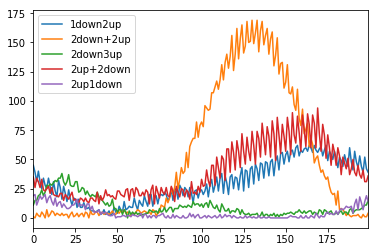

In [41]:
temp = cross2.max()
temp_path = temp[temp>10].index.tolist()
cross2[temp_path].plot()

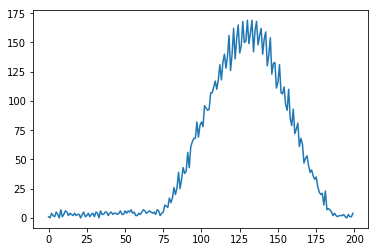

In [162]:
#可以看出路口2位相3 从 76s 开始
#对 2down+2up 数据对两部分做线性拟合，求最小值位置
y = cross2['2down+2up'].tolist()
plt.plot(range(len(y)),y)

最小值对应横坐标为： 76
所以路口2的位相3时从 76s 开始的


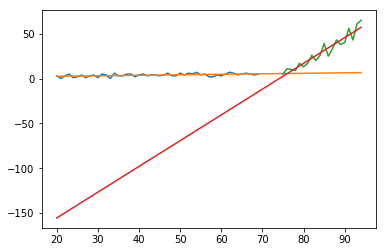

In [165]:
z1 = np.polyfit(range(20,70),y[20:70],1)
z2 = np.polyfit(range(75,95),y[75:95],1)

x = range(20,95)
y1 = z1[0]*x + z1[1]
y2 = z2[0]*x + z2[1]

plt.plot(range(20,70),y[20:70],x,y1,range(75,95),y[75:95],x,y2)
ty = abs(y1-y2)
print('最小值对应横坐标为：',ty.argmin()+x[0])
print('所以路口2的位相3是从 {}s 开始的'.format(ty.argmin()+x[0]))

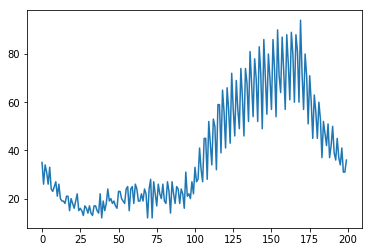

In [204]:
#对 2up+2down 数据对两部分做线性拟合，求最小值位置
y = cross2['2up+2down'].tolist()
plt.plot(range(len(y)),y)

In [207]:
28+121+13+10-96

76

最小值对应横坐标为： 96
所以路口2的位相3是从 83s 开始的


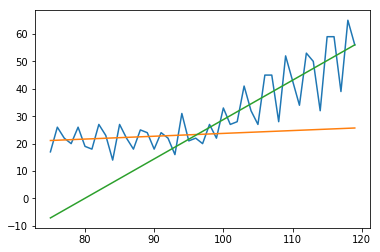

In [213]:
z1 = np.polyfit(range(75,90),y[75:90],1)
z2 = np.polyfit(range(100,120),y[100:120],1)

x = range(75,120)
y1 = z1[0]*x + z1[1]
y2 = z2[0]*x + z2[1]

plt.plot(range(75,120),y[75:120],x,y1,x,y2)
ty = abs(y1-y2)
print('最小值对应横坐标为：',ty.argmin()+x[0])
print('所以路口2的位相3是从 {}s 开始的'.format(ty.argmin()+x[0]-13))

In [44]:
cross3=data[(data.speed==0)&(data['y-coordinate']>segment[2])&
            (data['y-coordinate']<segment[1])].groupby(['cycleTime']).apply(
    lambda x: pd.DataFrame(x.path.value_counts()).T)

cross3 = cross3.reset_index(drop=True)
cross3 = cross3.fillna(0)
cross3.head()

,+,+3down,+3right,+3up,2down3up,3down+,3down+3down,3down+3left,3down+3up,3down3up,...,3right3down,3up+,3up+2up,3up+3down,3up+3right,3up+3up,3up2down,3up3down,4up+3up,4up3down
0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,6.0,7.0,2.0,...,0.0,0.0,0.0,13,0.0,0.0,13.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,8.0,1.0,...,0.0,0.0,1.0,8,0.0,0.0,14.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,5.0,0.0,...,0.0,0.0,0.0,12,0.0,0.0,11.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,6.0,0.0,0.0,5.0,4.0,2.0,...,0.0,0.0,0.0,15,0.0,0.0,11.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,3.0,0.0,...,0.0,0.0,1.0,5,0.0,0.0,10.0,0.0,0.0,0.0


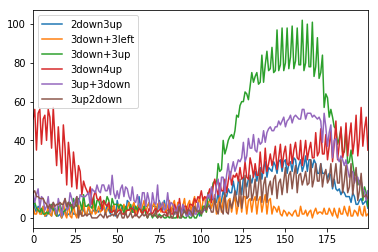

In [45]:
temp = cross3.max()
temp_path = temp[temp>10].index.tolist()
cross3[temp_path].plot()

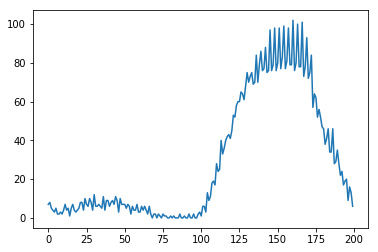

In [153]:
#可以看出路口3位相3 从 104s 开始
#对 3down+3up 数据对两部分做线性拟合，求最小值位置
y = cross3['3down+3up'].tolist()
#y = cross3['3up+3down'].tolist()
plt.plot(range(len(y)),y)

最小值对应横坐标为： 100
所以路口3点位相3时从 100s 开始的


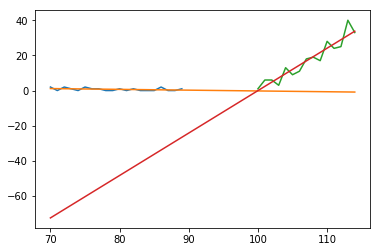

In [155]:
z1 = np.polyfit(range(70,90),y[70:90],1)
z2 = np.polyfit(range(100,115),y[100:115],1)

x = range(70,115)
y1 = z1[0]*x + z1[1]
y2 = z2[0]*x + z2[1]

plt.plot(range(70,90),y[70:90],x,y1,range(100,115),y[100:115],x,y2)
ty = abs(y1-y2)
print('最小值对应横坐标为：',ty.argmin()+x[0])
print('所以路口3的位相3是从 {}s 开始的'.format(ty.argmin()+x[0]))

In [54]:
cross4=data[(data.speed==0)&(data['y-coordinate']>segment[3])&
            (data['y-coordinate']<segment[2])].groupby(['cycleTime']).apply(
    lambda x: pd.DataFrame(x.path.value_counts()).T)

cross4 = cross4.reset_index(drop=True)
cross4 = cross4.fillna(0)
cross4.head()

,+4up,3down4up,4down,4down+4up,4down5up,4left+,4left+4left,4left+4right,4left4right,4right+,4right+4left,4right4up,4up+3up,4up+4down,4up+4up,4up3down,4up4down,5up4down
0,0.0,0.0,0.0,56,0.0,11.0,0.0,26,0.0,8.0,19.0,0.0,0.0,13.0,0.0,10.0,0.0,0.0
1,0.0,0.0,0.0,44,0.0,11.0,1.0,28,1.0,10.0,15.0,0.0,0.0,20.0,0.0,15.0,0.0,0.0
2,0.0,0.0,0.0,54,0.0,12.0,0.0,24,0.0,10.0,14.0,0.0,0.0,22.0,0.0,14.0,0.0,0.0
3,0.0,0.0,0.0,53,0.0,11.0,0.0,23,0.0,8.0,20.0,0.0,0.0,11.0,0.0,10.0,0.0,0.0
4,0.0,0.0,0.0,46,0.0,13.0,1.0,28,1.0,9.0,15.0,0.0,0.0,17.0,0.0,15.0,0.0,0.0


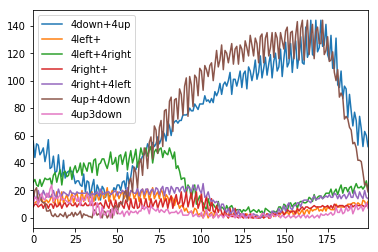

In [55]:
temp = cross4.max()
temp_path = temp[temp>10].index.tolist()
cross4[temp_path].plot()

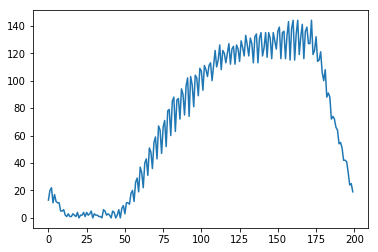

In [157]:
#----------------忽略（可以看出路口4位相3 从 51s 开始）
#对 4down+4up 数据对两部分做线性拟合，求最小值位置
#y = cross4['4down+4up'].tolist()
y = cross4['4up+4down'].tolist()
plt.plot(range(len(y)),y)

最小值对应横坐标为： 48
所以路口4点位相3时从 48s 开始的


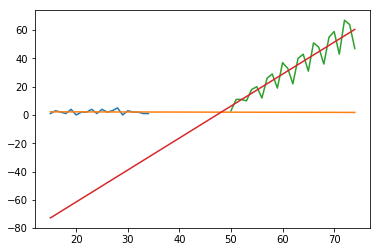

In [158]:
z1 = np.polyfit(range(15,35),y[15:35],1)
z2 = np.polyfit(range(50,75),y[50:75],1)

x = range(15,75)
y1 = z1[0]*x + z1[1]
y2 = z2[0]*x + z2[1]

plt.plot(range(15,35),y[15:35],x,y1,range(50,75),y[50:75],x,y2)
ty = abs(y1-y2)
print('最小值对应横坐标为：',ty.argmin()+x[0])
print('所以路口4的位相3是从 {}s 开始的'.format(ty.argmin()+x[0]))

In [61]:
cross5=data[(data.speed==0)&(data['y-coordinate']>segment[4])&
            (data['y-coordinate']<segment[3])].groupby(['cycleTime']).apply(
    lambda x: pd.DataFrame(x.path.value_counts()).T)

cross5 = cross5.reset_index(drop=True)
cross5 = cross5.fillna(0)
cross5.head()

,+5down,+5up,5down+,5down+5up,5down5up,5down6up,5left5down,5left5up,5right+5left,5right+5right,5up+5down,5up4down,5up5down,6up5down
0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,19,0.0,1.0,7.0,0.0,0.0
1,0.0,0.0,0.0,6.0,0.0,3.0,0.0,0.0,33,0.0,3.0,11.0,0.0,2.0
2,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,21,0.0,0.0,4.0,0.0,1.0
3,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,15,0.0,1.0,5.0,0.0,0.0
4,0.0,0.0,0.0,7.0,0.0,5.0,0.0,0.0,29,0.0,1.0,11.0,0.0,3.0


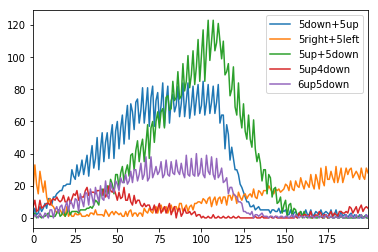

In [63]:
temp = cross5.max()
temp_path = temp[temp>10].index.tolist()
cross5[temp_path].plot()

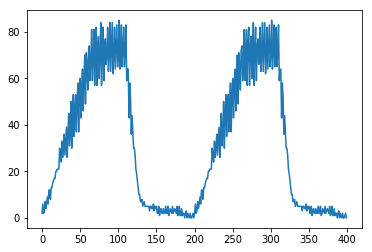

In [159]:
#（忽略此行）可以看出路口5位相3 从 9s 开始
#对 5down+5up 数据对两部分做线性拟合，求最小值位置
y = cross5['5down+5up'].tolist()+cross5['5down+5up'].tolist()

plt.plot(range(len(y)),y)

最小值对应横坐标为： 201
所以路口5点位相3时从 201s 开始的


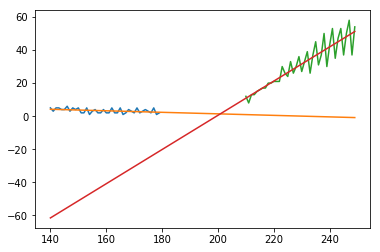

In [160]:
z1 = np.polyfit(range(140,180),y[140:180],1)
z2 = np.polyfit(range(210,250),y[210:250],1)

x = range(140,250)
y1 = z1[0]*x + z1[1]
y2 = z2[0]*x + z2[1]

plt.plot(range(140,180),y[140:180],x,y1,range(210,250),y[210:250],x,y2)
ty = abs(y1-y2)
print('最小值对应横坐标为：',ty.argmin()+x[0])
print('所以路口5的位相3是从 {}s 开始的'.format(ty.argmin()+x[0]))

In [70]:
cross6=data[(data.speed==0)&(data['y-coordinate']>segment[5])&
            (data['y-coordinate']<segment[4])].groupby(['cycleTime']).apply(
    lambda x: pd.DataFrame(x.path.value_counts()).T)

cross6 = cross6.reset_index(drop=True)
cross6 = cross6.fillna(0)
cross6.head()

,5down6up,6down+,6down+6left,6down+6up,6down6left,6down6up,6down7up,6left+,6left+6right,6left+6up,...,6right6left,6right6up,6up+,6up+6down,6up+6right,6up+6up,6up5down,6up6down,6up6right,7up6down
0,1.0,1.0,44,58.0,10.0,0.0,11,45,55,11,...,1.0,0.0,1.0,158,14,0.0,0.0,0.0,5.0,3.0
1,1.0,1.0,47,61.0,8.0,1.0,4,39,28,17,...,0.0,0.0,1.0,147,15,0.0,1.0,1.0,4.0,8.0
2,1.0,1.0,47,69.0,4.0,0.0,10,31,34,7,...,0.0,0.0,0.0,151,25,0.0,5.0,0.0,2.0,5.0
3,1.0,2.0,46,60.0,10.0,0.0,8,28,34,11,...,0.0,0.0,1.0,157,14,0.0,1.0,0.0,4.0,5.0
4,0.0,1.0,48,64.0,11.0,0.0,5,28,28,18,...,0.0,0.0,1.0,153,19,0.0,1.0,0.0,4.0,8.0


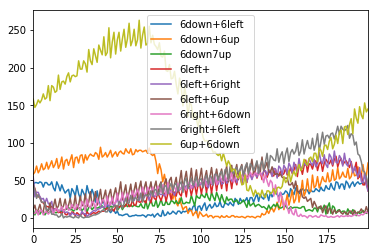

In [73]:
temp = cross6.max()
temp_path = temp[temp>30].index.tolist()
cross6[temp_path].plot()

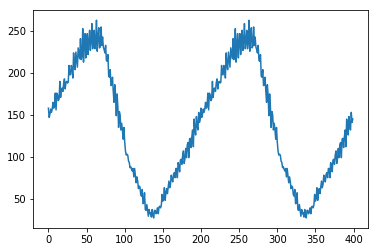

In [91]:
#对 6up+6down 数据对两部分做线性拟合，求最小值位置
y = cross6['6up+6down'].tolist()+cross6['6up+6down'].tolist()

plt.plot(range(len(y)),y)

最小值对应横坐标为： 133
所以路口6点位相3时从 133s 开始的


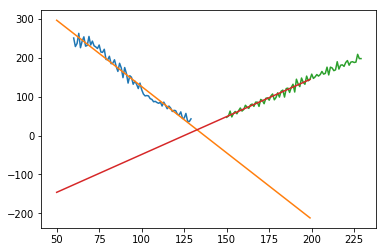

In [116]:
z1 = np.polyfit(range(60,130),y[60:130],1)
z2 = np.polyfit(range(150,230),y[150:230],1)

x = range(50,200)
y1 = z1[0]*x + z1[1]
y2 = z2[0]*x + z2[1]

plt.plot(range(60,130),y[60:130],x,y1,range(150,230),y[150:230],x,y2)
ty = abs(y1-y2)
print('最小值对应横坐标为：',ty.argmin()+x[0])
print('所以路口6的位相3是从 {}s 开始的'.format(ty.argmin()+x[0]))

In [124]:
cross7=data[(data.speed==0)&(data['y-coordinate']<segment[5])].groupby(['cycleTime']).apply(
    lambda x: pd.DataFrame(x.path.value_counts()).T)

cross7 = cross7.reset_index(drop=True)
cross7 = cross7.fillna(0)
cross7.head()

,+,+7right,6down7up,7down+,7down+7left,7down+7up,7down7left,7down7up,7left+,7left+7right,...,7left7up,7right+,7right+7down,7right+7left,7up+7down,7up+7right,7up+7up,7up6down,7up7down,7up7right
0,0.0,0.0,0.0,1.0,0.0,136.0,0.0,0.0,0.0,15,...,0.0,5.0,1.0,4.0,285,9,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,2.0,0.0,140.0,0.0,0.0,2.0,15,...,0.0,5.0,0.0,2.0,286,6,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,2.0,0.0,117.0,0.0,0.0,0.0,8,...,0.0,4.0,0.0,3.0,289,8,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,2.0,0.0,141.0,0.0,0.0,0.0,17,...,0.0,5.0,1.0,5.0,301,6,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,1.0,152.0,0.0,0.0,2.0,10,...,0.0,9.0,0.0,4.0,289,7,1.0,0.0,1.0,0.0


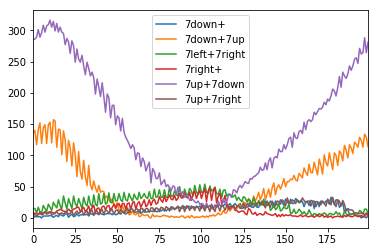

In [125]:
temp = cross7.max()
temp_path = temp[temp>30].index.tolist()
cross7[temp_path].plot()

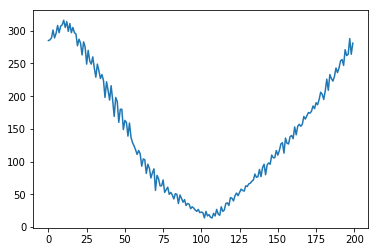

In [126]:
#对 7up+7down 数据对两部分做线性拟合，求最小值位置
y = cross7['7up+7down']
plt.plot(range(len(y)),y)

最小值对应横坐标为： 107
所以路口7点位相3时从 107s 开始的


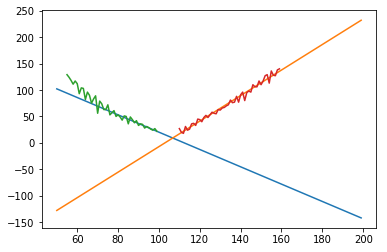

In [142]:
z1 = np.polyfit(y[75:100].index,y[75:100],1)
z2 = np.polyfit(y[110:160].index,y[110:160],1)

x = range(50,200)
y1 = z1[0]*x + z1[1]
y2 = z2[0]*x + z2[1]

plt.plot(x,y1,x,y2)
plt.plot(y[55:100])
plt.plot(y[110:160])
ty = abs(y1-y2)
print('最小值对应横坐标为：',ty.argmin()+x[0])
print('所以路口7的位相3是从 {}s 开始的'.format(ty.argmin()+x[0]))

In [191]:
for i,j in zip(range(1,8),[120,159,172,119,71,7,178]):
    print('根据方案得到路口{}位相3开始时刻为：{}s'.format(i,j))

根据方案得到路口1位相3开始时刻为：120s
根据方案得到路口2位相3开始时刻为：159s
根据方案得到路口3位相3开始时刻为：172s
根据方案得到路口4位相3开始时刻为：119s
根据方案得到路口5位相3开始时刻为：71s
根据方案得到路口6位相3开始时刻为：7s
根据方案得到路口7位相3开始时刻为：178s


In [210]:
for i,j in zip(range(1,8),[50,83,100,48,1,133,107]):
    print('根据数据得到路口{}位相3开始时刻为：{}s'.format(i,j))

根据数据得到路口1位相3开始时刻为：50s
根据数据得到路口2位相3开始时刻为：83s
根据数据得到路口3位相3开始时刻为：100s
根据数据得到路口4位相3开始时刻为：48s
根据数据得到路口5位相3开始时刻为：1s
根据数据得到路口6位相3开始时刻为：133s
根据数据得到路口7位相3开始时刻为：107s


In [209]:
o = [120,159,172,119,71,207,178]
n = [50,83,100,48,1,133,107]
[i-j for i,j in zip(o,n)]

[70, 76, 72, 71, 70, 74, 71]

In [215]:
np.mean([i-j for i,j in zip(o,n)])

72.0

In [241]:
filename = r'模版方案.txt'
with open(filename) as f:
    plan = f.readlines()

plan =[[int(t) for t in x.split(',')] for x in plan[0].split(';')]
plan

[[0, 111, 9, 43, 37],
 [10, 28, 121, 13, 38],
 [10, 28, 134, 38],
 [10, 34, 75, 31, 19, 41],
 [134, 48, 89, 63],
 [105, 35, 67, 52, 46],
 [52, 30, 96, 74]]

In [262]:
timeDelta = 72
def cross1phase(time):
    p = plan[0]
    time = (time-p[0]+timeDelta)%200
    phase = 0
    for pi in p[1:]:
        phase = phase+1
        time = time-pi
        if time<0: return phase

def cross2phase(time):
    p = plan[1]
    time = (time-p[0]+timeDelta)%200
    phase = 0
    for pi in p[1:]:
        phase = phase+1
        time = time-pi
        if time<0: return phase
        
def cross3phase(time):
    p = plan[2]
    time = (time-p[0]+timeDelta)%200
    phase = 0
    for pi in p[1:]:
        phase = phase+1
        time = time-pi
        if time<0: return phase
        
def cross4phase(time):
    p = plan[3]
    time = (time-p[0]+timeDelta)%200
    phase = 0
    for pi in p[1:]:
        phase = phase+1
        time = time-pi
        if time<0: return phase

def cross5phase(time):
    p = plan[4]
    time = (time-p[0]+timeDelta)%200
    phase = 0
    for pi in p[1:]:
        phase = phase+1
        time = time-pi
        if time<0: return phase

def cross6phase(time):
    p = plan[5]
    time = (time-p[0]+timeDelta)%200
    phase = 0
    for pi in p[1:]:
        phase = phase+1
        time = time-pi
        if time<0: return phase

def cross7phase(time):
    p = plan[6]
    time = (time-p[0]+timeDelta)%200
    phase = 0
    for pi in p[1:]:
        phase = phase+1
        time = time-pi
        if time<0: return phase

In [278]:
data.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,datetime,cross,road,path,cycleTime
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0,2017-05-04 08:52:44+08:00,0,6right,6right+6left,164
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0,2017-05-04 08:52:47+08:00,0,6right,6right+6left,167
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0,2017-05-04 08:52:50+08:00,0,6right,6right+6left,170
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0,2017-05-04 08:52:53+08:00,0,6right,6right+6left,173
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0,2017-05-04 08:52:56+08:00,0,6right,6right+6left,176


In [282]:
data['cross1phase'] = data.time.apply(cross1phase)
data['cross2phase'] = data.time.apply(cross2phase)
data['cross3phase'] = data.time.apply(cross3phase)
data['cross4phase'] = data.time.apply(cross4phase)
data['cross5phase'] = data.time.apply(cross5phase)
data['cross6phase'] = data.time.apply(cross6phase)
data['cross7phase'] = data.time.apply(cross7phase)
data.head()

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,datetime,cross,road,path,cycleTime,cross1phase,cross2phase,cross3phase,cross4phase,cross5phase,cross6phase,cross7phase
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0,2017-05-04 08:52:44+08:00,0,6right,6right+6left,164,1,2,2,2,3,3,2
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0,2017-05-04 08:52:47+08:00,0,6right,6right+6left,167,1,2,2,2,3,3,2
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0,2017-05-04 08:52:50+08:00,0,6right,6right+6left,170,1,2,2,2,3,3,2
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0,2017-05-04 08:52:53+08:00,0,6right,6right+6left,173,1,2,2,2,3,3,2
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0,2017-05-04 08:52:56+08:00,0,6right,6right+6left,176,1,2,2,2,3,3,2


In [283]:
data.to_csv('fyd_add_signal_state.csv')

,vehicle-id,time,x-coordinate,y-coordinate,speed,category,datetime,cross,road,path,cycleTime,cross1phase,cross2phase,cross3phase,cross4phase,cross5phase,cross6phase,cross7phase
0,4c0c4745067197be22182d262b44f48a,1493859164,521696.473915,55061.506951,6.6,0,2017-05-04 08:52:44+08:00,0,6right,6right+6left,164,1,2,2,2,3,3,2
1,4c0c4745067197be22182d262b44f48a,1493859167,521680.892788,55051.685121,6.1,0,2017-05-04 08:52:47+08:00,0,6right,6right+6left,167,1,2,2,2,3,3,2
2,4c0c4745067197be22182d262b44f48a,1493859170,521665.311690,55041.863291,6.2,0,2017-05-04 08:52:50+08:00,0,6right,6right+6left,170,1,2,2,2,3,3,2
3,4c0c4745067197be22182d262b44f48a,1493859173,521648.617687,55030.255674,6.9,0,2017-05-04 08:52:53+08:00,0,6right,6right+6left,173,1,2,2,2,3,3,2
4,4c0c4745067197be22182d262b44f48a,1493859176,521628.584926,55019.540951,7.2,0,2017-05-04 08:52:56+08:00,0,6right,6right+6left,176,1,2,2,2,3,3,2
5,4c0c4745067197be22182d262b44f48a,1493859179,521606.326358,55007.933333,8.2,0,2017-05-04 08:52:59+08:00,0,6right,6right+6left,179,1,2,2,2,3,4,2
6,4c0c4745067197be22182d262b44f48a,1493859182,521582.954924,54995.432822,8.7,0,2017-05-04 08:53:02+08:00,0,6right,6right+6left,182,1,2,2,2,3,4,2
7,4c0c4745067197be22182d262b44f48a,1493859185,521556.244791,54977.574950,10.9,0,2017-05-04 08:53:05+08:00,0,6right,6right+6left,185,1,2,2,2,3,4,2
8,4c0c4745067197be22182d262b44f48a,1493859188,521539.551000,54966.860226,6.9,0,2017-05-04 08:53:08+08:00,0,6right,6right+6left,188,1,2,2,2,3,4,2
9,4c0c4745067197be22182d262b44f48a,1493859191,521523.970159,54957.038396,5.8,0,2017-05-04 08:53:11+08:00,0,6right,6right+6left,191,1,2,2,2,3,4,2
